# Preprocessing UCI Heart disease dataset
**Neural Networks for Machine Learning Applications**<br>
22.1.2023<br>
Sakari Lukkarinen<br>
[Information Technology, Bachelor's Degree](https://www.metropolia.fi/en/academics/bachelors-degrees/information-technology)<br>
[Metropolia University of Applied Sciences](https://www.metropolia.fi/en)

## 1. Introduction

The aim of this Notebook is to show how different features, like binary, categorical and numerical, can be transformed and scaled before training.

## 2. Setup

We use 
- *numpy* to concatenate the features
- *pandas* to read the dataset and study the descriptive statistics 
- *matplotlib* and *seaborn* to visualize the features, and 
- *sklearn* to preprocess the dataset. 

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

## 3. Dataset
Read in the dataset using `pandas.read_csv` and show the column names.

In [6]:

df = pd.read_csv('cleveland_heartdata.csv')
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'condition'],
      dtype='object')

In [7]:
# Check the shape of the dataset
df.shape

(303, 14)

## 4. Preprocessing
Separate the labels and features and show how many disease and healthy cases are in the original dataset.

In [8]:
labels = (df['condition'] > 0)
features = df.drop(['condition'], axis = 1)

print(f'Disease cases: {sum(labels == 1):8d}')
print(f'Healthy cases: {sum(labels == 0):8d}')

Disease cases:      139
Healthy cases:      164


### 4.1. Study the features

In [9]:
# Study the features
features.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3
5,56,1,2,120,236,0,0,178,0,0.8,1,0,3
6,62,0,4,140,268,0,2,160,0,3.6,3,2,3
7,57,0,4,120,354,0,0,163,1,0.6,1,0,3
8,63,1,4,130,254,0,2,147,0,1.4,2,1,7
9,53,1,4,140,203,1,2,155,1,3.1,3,0,7


In [10]:
# Get the descriptive statistics
features.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000


The features can be divided into three sets:
- binary features having values 0 or 1
- numerical features having range of values
- categorical features having numerical categorical values

In [11]:
bin_features = ['sex', 'fbs', 'exang']
num_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
cat_features = ['cp', 'restecg', 'slope', 'ca', 'thal']

Let's make a histogram of each of these features. We start with binary features.

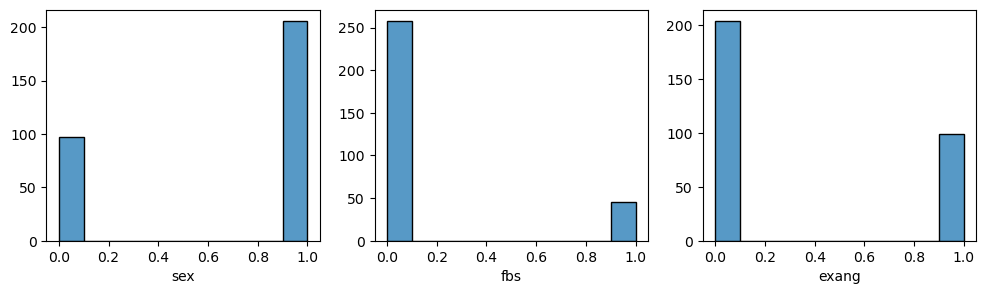

In [12]:
N = len(bin_features)
fig, axs = plt.subplots(1, N, figsize=(12, 3))

for n in range(N):
    sns.histplot(data=features, x=bin_features[n], ax=axs[n])
    axs[n].set_ylabel('')
plt.show()

Next the categorical features.

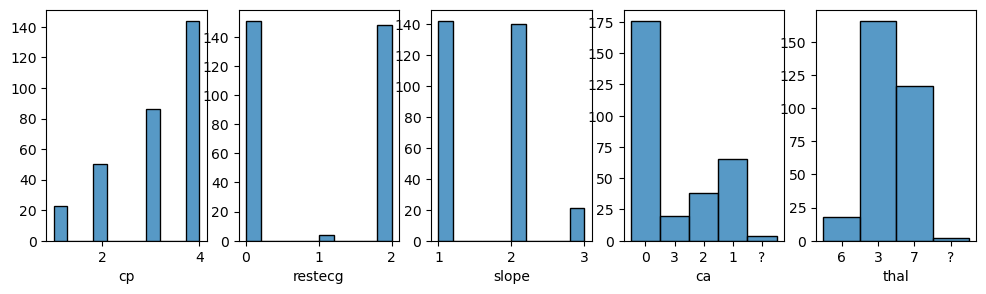

In [13]:
N = len(cat_features)
fig, axs = plt.subplots(1, N, figsize=(12, 3))

for n in range(N):
    sns.histplot(data=features, x=cat_features[n], ax=axs[n])
    axs[n].set_ylabel('')
plt.show()

And finally the numerical features.

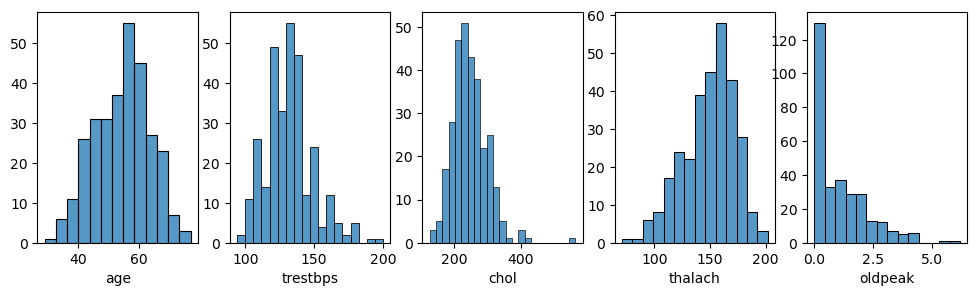

In [14]:
N = len(num_features)
fig, axs = plt.subplots(1, N, figsize=(12, 3))

for n in range(N):
    sns.histplot(data=features, x=num_features[n], ax=axs[n])
    axs[n].set_ylabel('')
plt.show()

### 4.2. Preprocessing features
All binary features can be merged together.

In [15]:
bin_values = features[bin_features].values
bin_values[:5]

array([[1, 1, 0],
       [1, 0, 1],
       [1, 0, 1],
       [1, 0, 0],
       [0, 0, 0]], dtype=int64)

For numerical features we use one of the `sklearn.preprocessing` scalers.

In [16]:
transformer = preprocessing.RobustScaler().fit(features[num_features])
num_values = transformer.transform(features[num_features])
num_values[:5]

array([[ 0.53846154,  0.75      , -0.125     , -0.09230769,  0.9375    ],
       [ 0.84615385,  1.5       ,  0.703125  , -1.38461538,  0.4375    ],
       [ 0.84615385, -0.5       , -0.1875    , -0.73846154,  1.125     ],
       [-1.46153846,  0.        ,  0.140625  ,  1.04615385,  1.6875    ],
       [-1.15384615,  0.        , -0.578125  ,  0.58461538,  0.375     ]])

Categorical features are one-hot encoded.

In [17]:
encoder = preprocessing.OneHotEncoder().fit(features[cat_features])
cat_values = encoder.transform(features[cat_features]).toarray()
cat_values[:5]

array([[1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0.,
        1., 0., 0.],
       [0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 1.,
        0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0.,
        0., 1., 0.],
       [0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1.,
        0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 1.,
        0., 0., 0.]])

### 4.3. Merge preprocessed features
Then we merge all values together. First check the shape of the values.

In [18]:
bin_values.shape, num_values.shape, cat_values.shape

((303, 3), (303, 5), (303, 19))

Concatenate all values together columnwise.

In [19]:
all_values = np.concatenate((bin_values, num_values, cat_values), axis = 1)
all_values.shape

(303, 27)

Let's check how one row of data looks like.

In [20]:
all_values[:1]

array([[ 1.        ,  1.        ,  0.        ,  0.53846154,  0.75      ,
        -0.125     , -0.09230769,  0.9375    ,  1.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  1.        ,
         0.        ,  0.        ,  1.        ,  1.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  1.        ,
         0.        ,  0.        ]])

Let's convert the values back to Pandas' DataFrame and study the descriptive statistics.

In [21]:
preprocessed_features = pd.DataFrame(all_values)
preprocessed_features.describe().T

,count,mean,std,min,25%,50%,75%,max
0,303.0,0.679868,0.467299,0.000000,0.000000,1.0,1.000000,1.000000
1,303.0,0.148515,0.356198,0.000000,0.000000,0.0,0.000000,1.000000
2,303.0,0.326733,0.469794,0.000000,0.000000,0.0,1.000000,1.000000
3,303.0,-0.120081,0.695282,-2.076923,-0.615385,0.0,0.384615,1.615385
4,303.0,0.084488,0.879987,-1.800000,-0.500000,0.0,0.500000,3.500000
5,303.0,0.088954,0.809014,-1.796875,-0.468750,0.0,0.531250,5.046875
6,303.0,-0.104392,0.703846,-2.523077,-0.600000,0.0,0.400000,1.507692
7,303.0,0.149752,0.725672,-0.500000,-0.500000,0.0,0.500000,3.375000
8,303.0,0.075908,0.265288,0.000000,0.000000,0.0,0.000000,1.000000
9,303.0,0.165017,0.371809,0.000000,0.000000,0.0,0.000000,1.000000


## Learn more

- [Preprocessing data | scikit-learn](https://scikit-learn.org/stable/modules/preprocessing.html#)
- [Common pitfalls | scikit-learn](https://scikit-learn.org/stable/common_pitfalls.html)